In [2]:
# -*- coding : ISO-8859-1 -*-
%matplotlib inline

In [3]:
import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Step 1 탐색 : MovieLens 데이터 살펴보기

In [4]:
# Data Source : https://grouplens.org/datasets/movielens

rating_file = '../data/ml-1m/ratings.dat'
movie_file = '../data/ml-1m/movies.dat'
user_file = '../data/ml-1m/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file, 
                                     names = ['user_id', 'movie_id', 'rating', 'time'], 
                                     delimiter = '::', encoding = "ISO-8859-1")
movie_data = pd.io.parsers.read_csv(movie_file, 
                                    names = ['movie_id', 'title', 'genre'], 
                                    delimiter = '::', encoding = "ISO-8859-1")
user_data = pd.io.parsers.read_csv(user_file, 
                                   names = ['user_id', 'gender', 'age', 'occupation', 'zipcode'], 
                                   delimiter = '::', encoding = "ISO-8859-1")

In [5]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Step 2 분석: 탐색적 데이터 분석하기

In [8]:
print("total number of movie in data : ", len(movie_data['movie_id'].unique()))

movie_data['year'] = movie_data['title'].apply(lambda x : x[-5:-1])
movie_data['year'].value_counts().head(10)

total number of movie in data :  3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [9]:
unique_genre_dict = {}
parsed_genre = []

for idx, row in movie_data.iterrows():
    genre_combination = row['genre']
    parsed_genre = genre_combination.split('|')
    for genre in parsed_genre:
        if genre not in unique_genre_dict:
            unique_genre_dict[genre] = 1
        else:
            unique_genre_dict[genre] += 1

unique_genre_dict

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

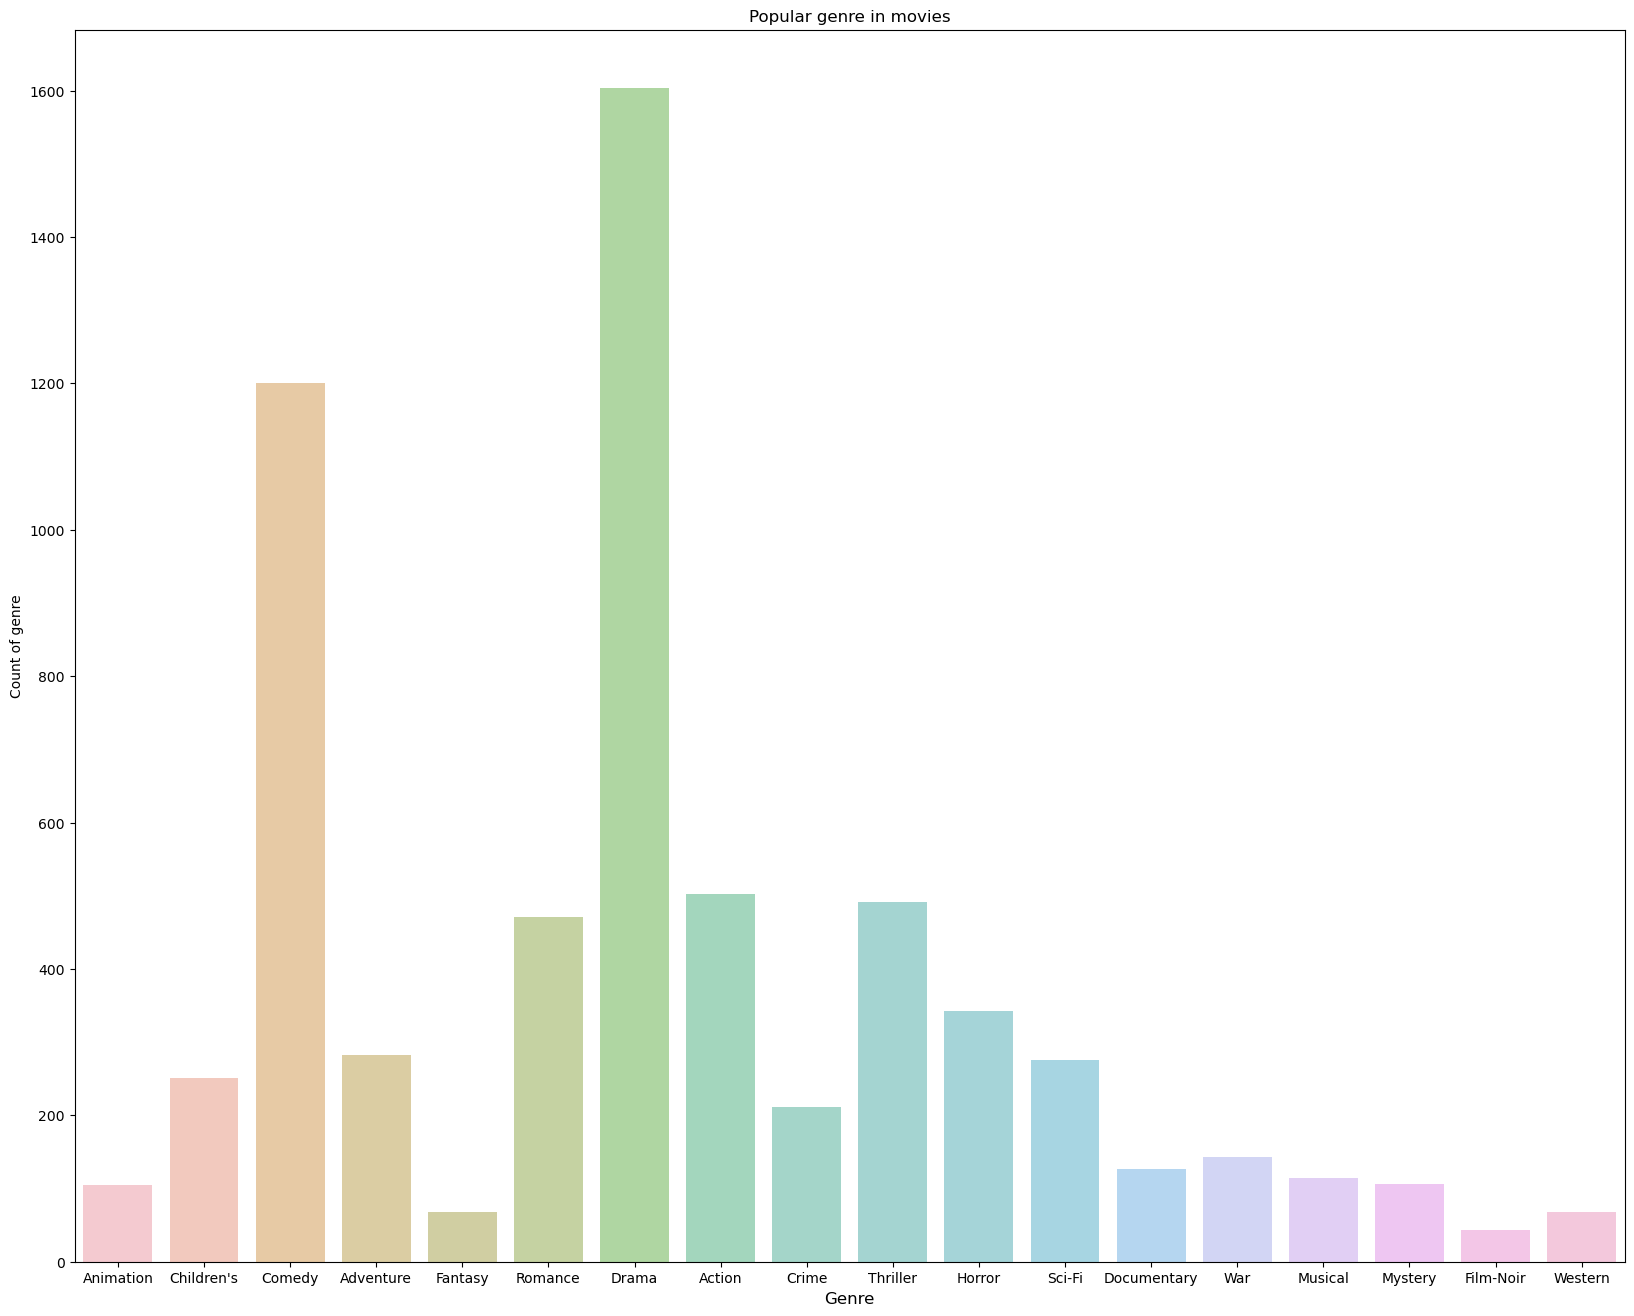

In [10]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha = 0.5) # alpha : 투명도
plt.title('Popular genre in movies')
plt.ylabel('Count of genre')
plt.xlabel('Genre', fontsize = 12)

plt.show()

In [11]:
print("total number of user in data : ", len(user_data['user_id'].unique()))

total number of user in data :  6040


In [12]:
from collections import Counter 

# 유저의 성별 탐색
gender_combi = [i for i in user_data['gender']]
unique_gender_dict = Counter(gender_combi)
unique_gender_dict

Counter({'F': 1709, 'M': 4331})

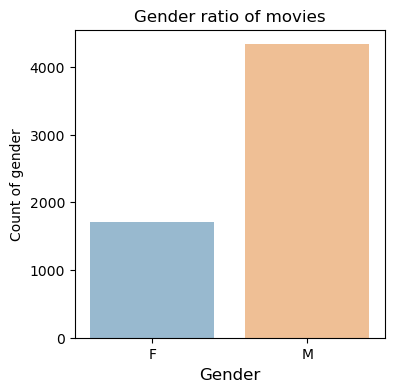

In [13]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.barplot(list(unique_gender_dict.keys()), list(unique_gender_dict.values()), alpha = 0.5) # alpha : 투명도
plt.title('Gender ratio of movies')
plt.ylabel('Count of gender')
plt.xlabel('Gender', fontsize = 12)

plt.show()

In [14]:
# 유저의 연령대 탐색
spectrum_of_age_dict = {'0~9' : 0, '10~19' : 0, '20~29' : 0, '30~39' : 0, '40~49' : 0, '50~59' : 0, 
                        '60~69' : 0, '70~79' : 0, '80~89' : 0, '90~99' : 0, 'etc' : 0}

age_combination = [i for i in user_data['age']]

for age in age_combination:
    if 0 <= age <= 9:
        spectrum_of_age_dict['0~9'] += 1
    elif 10 <= age <= 19:
        spectrum_of_age_dict['10~19'] += 1
    elif 20 <= age <= 29:
        spectrum_of_age_dict['20~29'] += 1
    elif 30 <= age <= 39:
        spectrum_of_age_dict['30~39'] += 1
    elif 40 <= age <= 49:
        spectrum_of_age_dict['40~49'] += 1
    elif 50 <= age <= 59:
        spectrum_of_age_dict['50~59'] += 1
    elif 60 <= age <= 69:
        spectrum_of_age_dict['60~69'] += 1
    elif 70 <= age <= 79:
        spectrum_of_age_dict['70~79'] += 1
    elif 80 <= age <= 89:
        spectrum_of_age_dict['80~89'] += 1
    elif 90 <= age <= 99:
        spectrum_of_age_dict['90~99'] += 1
    else :
        spectrum_of_age_dict['etc'] += 1
        
spectrum_of_age_dict

{'0~9': 222,
 '10~19': 1103,
 '20~29': 2096,
 '30~39': 1193,
 '40~49': 550,
 '50~59': 876,
 '60~69': 0,
 '70~79': 0,
 '80~89': 0,
 '90~99': 0,
 'etc': 0}

In [15]:
# Chat-GPT
from collections import defaultdict

spectrum_of_age_dict = defaultdict(int)
for age in age_combination:
    if age < 0:
        spectrum_of_age_dict['etc'] += 1
    elif age < 100:
        spectrum_of_age_dict[f"{(age // 10) * 10}~{(age // 10) * 10 + 9}"] += 1
    else:
        spectrum_of_age_dict['etc'] += 1
        
spectrum_of_age_dict

defaultdict(int,
            {'0~9': 222,
             '50~59': 876,
             '20~29': 2096,
             '40~49': 550,
             '30~39': 1193,
             '10~19': 1103})

Text(0.5, 0, 'age')

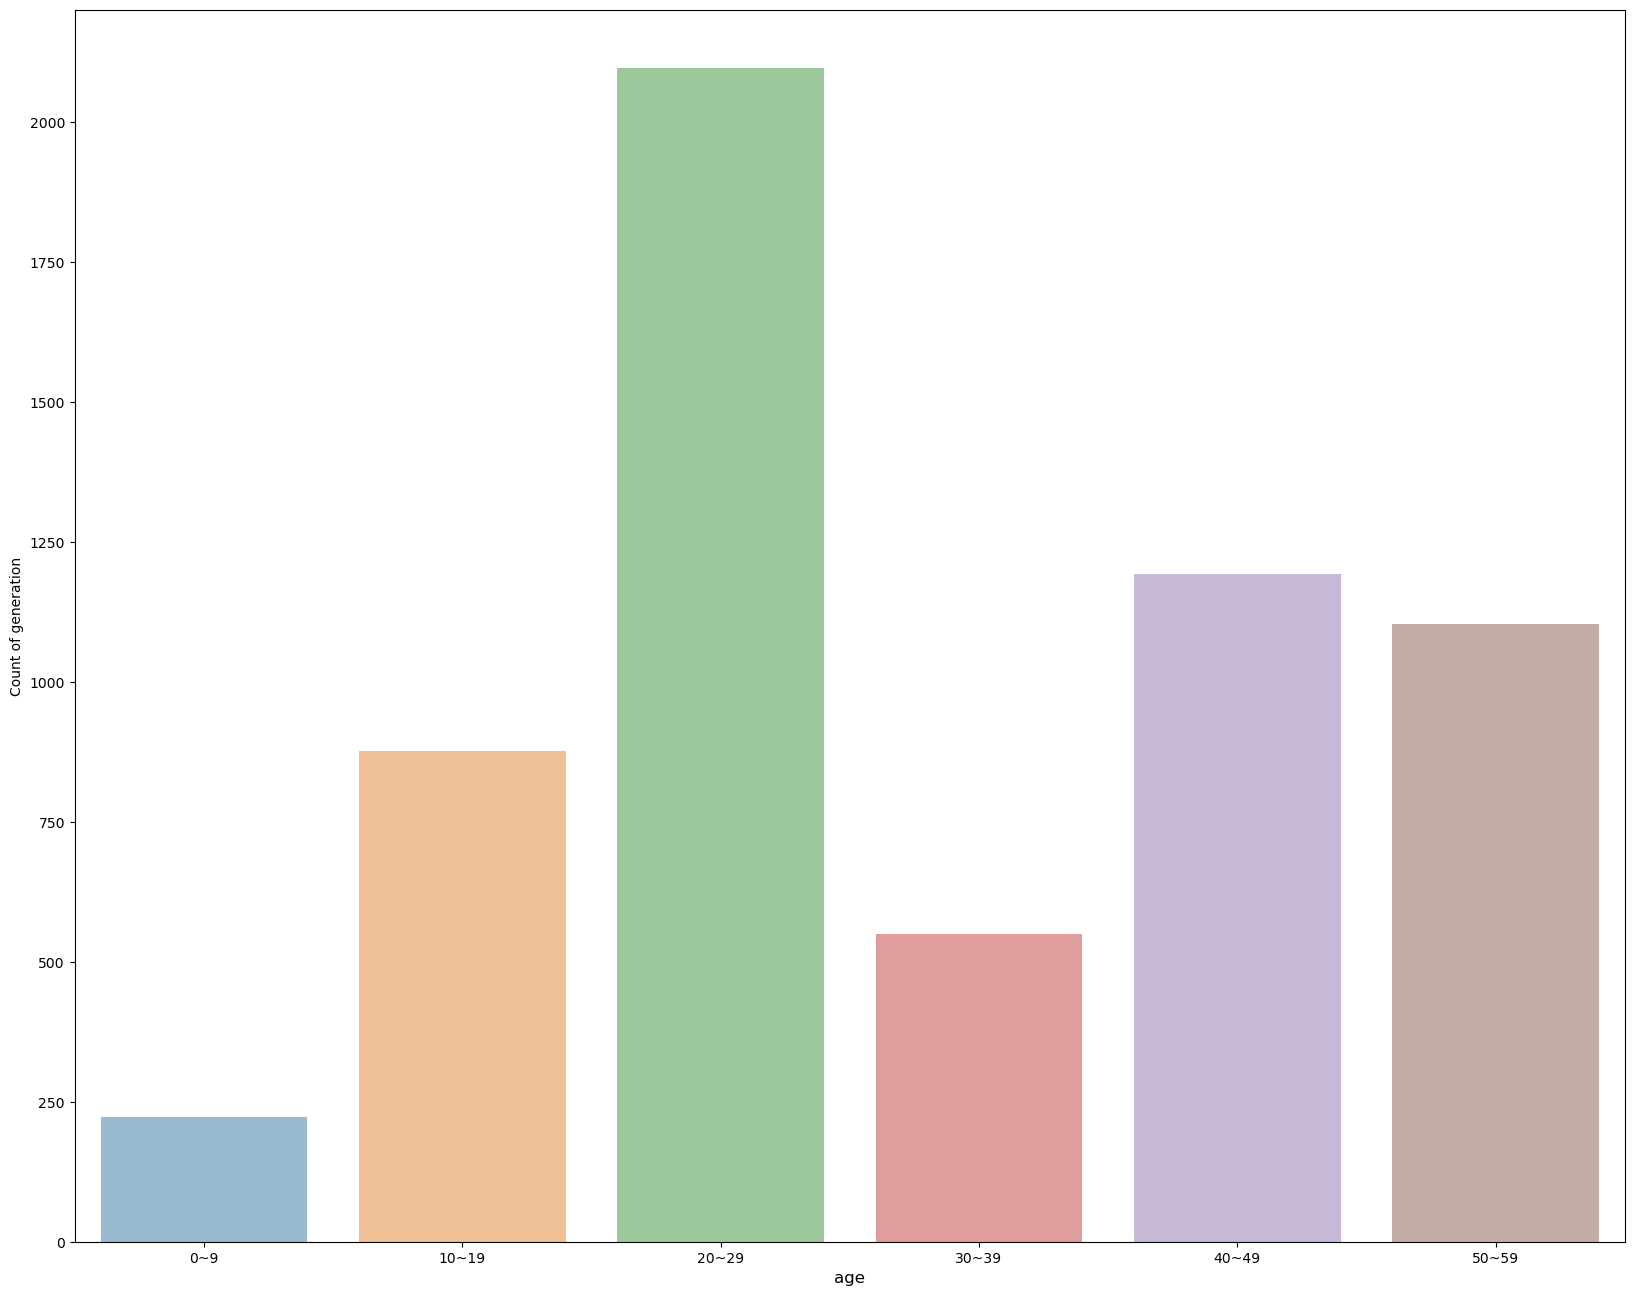

In [16]:
plt.rcParams['figure.figsize'] = [20, 16]

# 연령대 정렬
sns.barplot(sorted(list(spectrum_of_age_dict.keys())), list(spectrum_of_age_dict.values()), alpha = 0.5)
plt.ylabel('Count of generation')
plt.xlabel('age', fontsize = 12)

In [17]:
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
movie_rate_count

array([2077,  701,  478, ...,   54,   40,  388], dtype=int64)

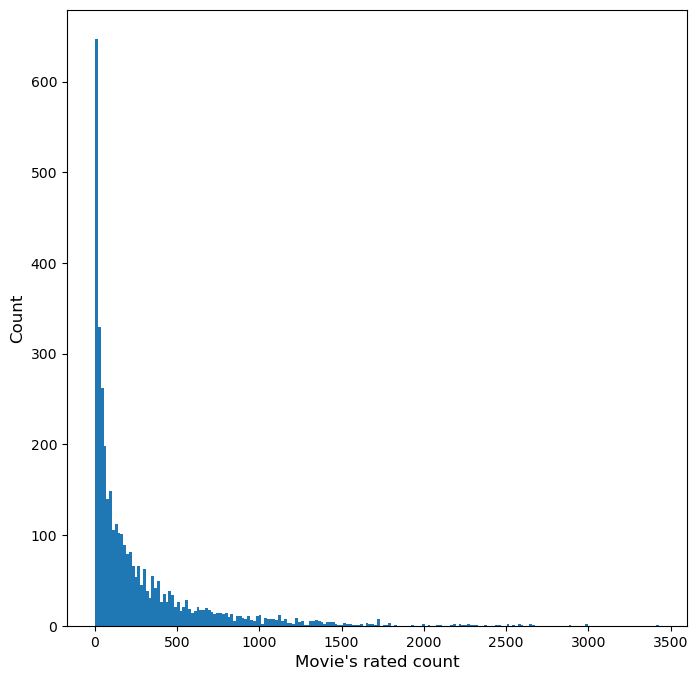

total number of movie in data :  3883
total number of movie rated below 100 :  2006


In [18]:
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Movie\'s rated count', fontsize = 12)
plt.show()

print('total number of movie in data : ', len(movie_data['movie_id'].unique()))
print('total number of movie rated below 100 : ', len(movie_rate_count[movie_rate_count > 100]))

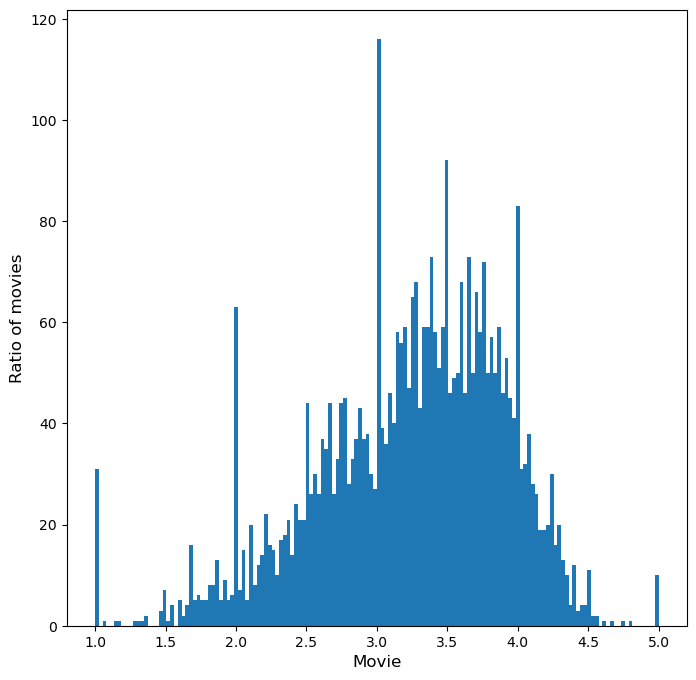

In [19]:
# 영화별 평균 평점 : 대부분 2~4점 분포 확인 가능!
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count', 'mean'])

movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']

plt.rcParams['figure.figsize'] = [8, 8]
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid = False)
plt.ylabel('Ratio of movies', fontsize = 12)
plt.xlabel('Movie', fontsize = 12)
plt.show()

In [20]:
# 유저별로 평가한 영화 개수(count), 평균 점수('mean'), 편차('std')
unique_movie_by_users = rating_data.groupby('user_id')['movie_id'].agg(['count', 'mean', 'std'], index = 'user_id')
unique_movie_by_users.head()

,count,mean,std
user_id,,,
1,53,1560.547170,935.976178
2,129,1784.015504,1040.349122
3,51,1787.450980,1007.032975
4,21,1932.000000,1070.516184
5,198,1762.747475,1079.861293


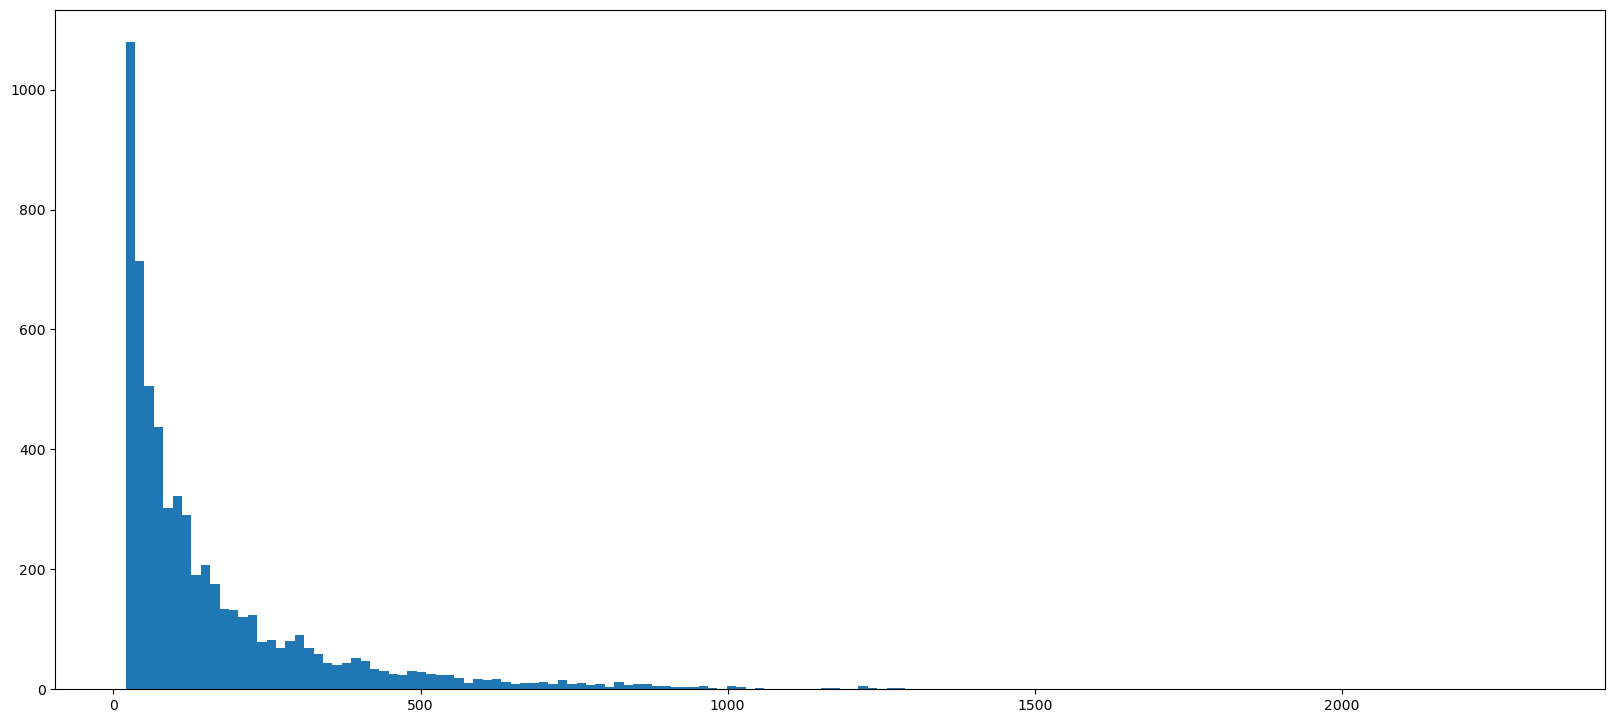

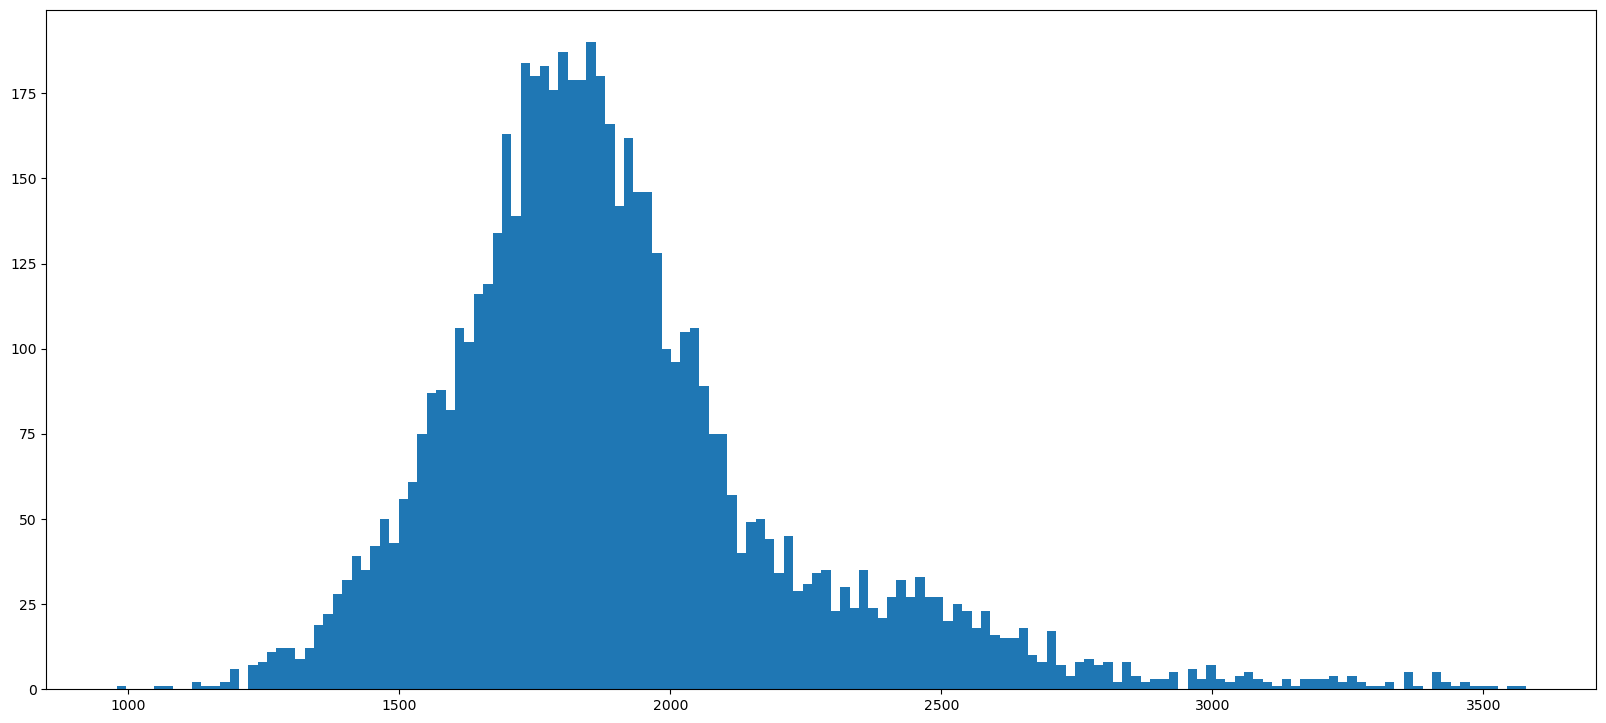

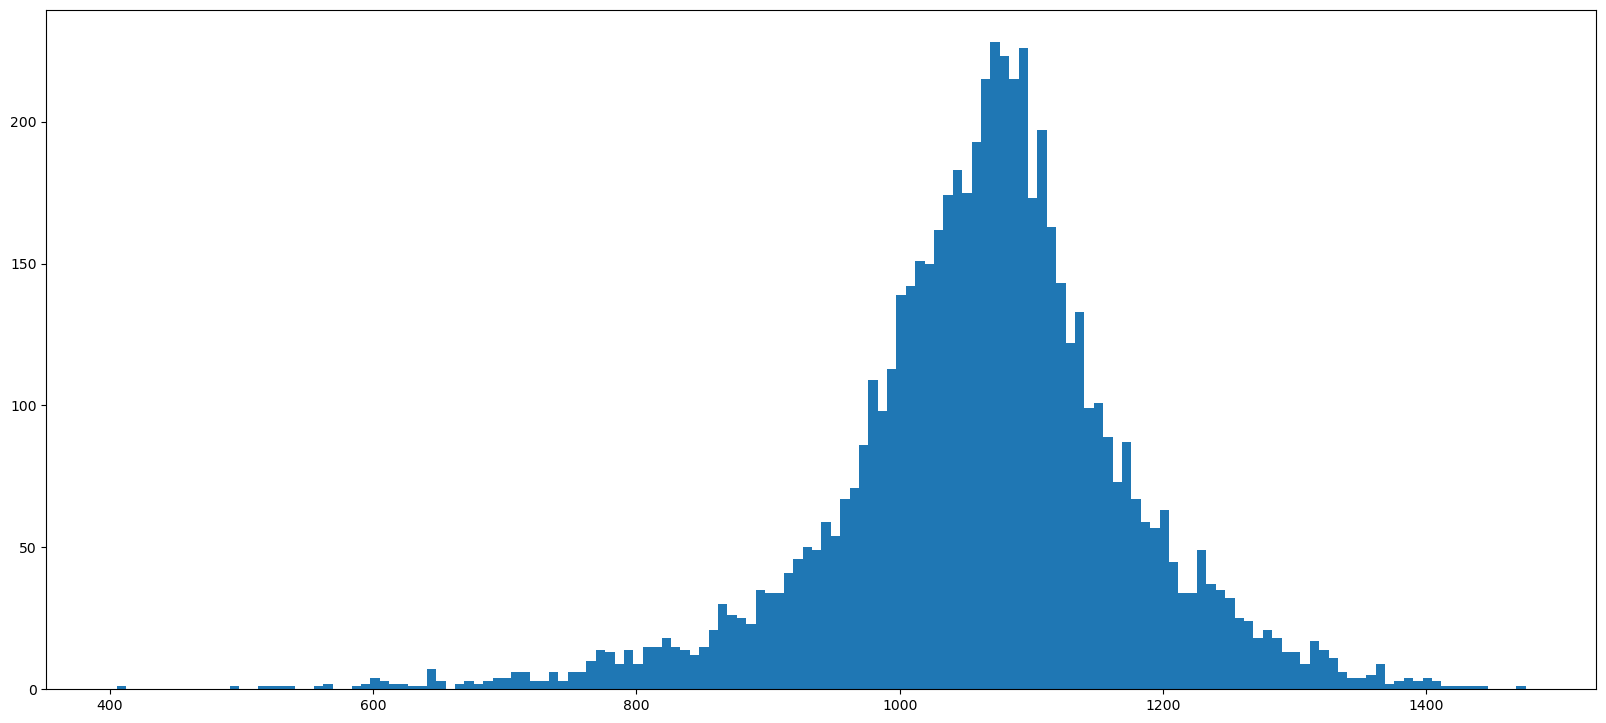

In [21]:
# subplot으로 여러 개 그래프 그리기
plt.rcParams['figure.figsize'] = [20, 30]
for i in range(len(unique_movie_by_users.columns)):
    plt.subplot(3, 1, i+1)
    unique_movie_by_users[f'{unique_movie_by_users.columns[i]}'].hist(bins=150, grid=False)
    plt.show()

Step 3 예측 : 수학적 기법을 활용해 평점 예측하기

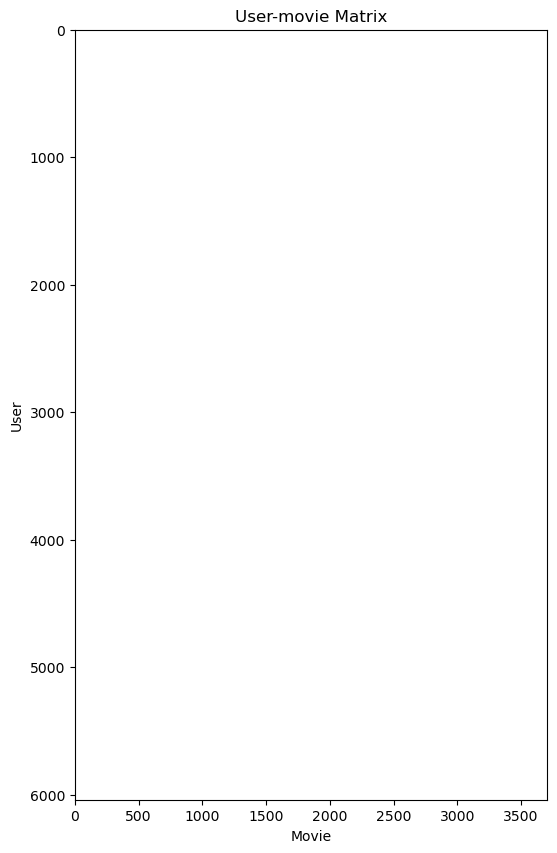

In [25]:
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).unstack()

plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.title("User-movie Matrix")
plt.show()

In [26]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale = (1, 5))  # 평점 범위가 1~5인 객체
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)  # load_from_df()
train_data = data.build_full_trainset()  # build_full_trainset()

In [27]:
train_start = time.time()
model = SVD(n_factors = 8,
            lr_all = 0.005,
            reg_all = 0.02,
            n_epochs = 100)
model.fit(train_data)
train_end = time.time()
print("training time of model : %.2f seconds" % (train_end - train_start))  # 포매팅

training time of model : 16.89 seconds


In [28]:
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [30]:
# {movie_id : rating}
target_user_movie_rating_dict = defaultdict(int)

for idx, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    rating = row['rating']
    target_user_movie_rating_dict[movie_id] = rating

target_user_movie_rating_dict

defaultdict(int,
            {3468: 5,
             1210: 3,
             2951: 4,
             1214: 4,
             1036: 4,
             260: 5,
             2028: 5,
             480: 4,
             1196: 2,
             1198: 5,
             1954: 5,
             1097: 4,
             3418: 4,
             3702: 4,
             2366: 4,
             1387: 5,
             3527: 1,
             1201: 5,
             2692: 5,
             2947: 5,
             1240: 5})

In [54]:
test_data = []
# 타깃 유저가 보지 않은 영화 추출 : (user_id, movie_id, rating) 형태
for idx, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id not in target_user_movie_rating_dict:
        test_data.append((target_user_id, movie_id, 0))

test_data

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0),
 (4, 11, 0),
 (4, 12, 0),
 (4, 13, 0),
 (4, 14, 0),
 (4, 15, 0),
 (4, 16, 0),
 (4, 17, 0),
 (4, 18, 0),
 (4, 19, 0),
 (4, 20, 0),
 (4, 21, 0),
 (4, 22, 0),
 (4, 23, 0),
 (4, 24, 0),
 (4, 25, 0),
 (4, 26, 0),
 (4, 27, 0),
 (4, 28, 0),
 (4, 29, 0),
 (4, 30, 0),
 (4, 31, 0),
 (4, 32, 0),
 (4, 33, 0),
 (4, 34, 0),
 (4, 35, 0),
 (4, 36, 0),
 (4, 37, 0),
 (4, 38, 0),
 (4, 39, 0),
 (4, 40, 0),
 (4, 41, 0),
 (4, 42, 0),
 (4, 43, 0),
 (4, 44, 0),
 (4, 45, 0),
 (4, 46, 0),
 (4, 47, 0),
 (4, 48, 0),
 (4, 49, 0),
 (4, 50, 0),
 (4, 51, 0),
 (4, 52, 0),
 (4, 53, 0),
 (4, 54, 0),
 (4, 55, 0),
 (4, 56, 0),
 (4, 57, 0),
 (4, 58, 0),
 (4, 59, 0),
 (4, 60, 0),
 (4, 61, 0),
 (4, 62, 0),
 (4, 63, 0),
 (4, 64, 0),
 (4, 65, 0),
 (4, 66, 0),
 (4, 67, 0),
 (4, 68, 0),
 (4, 69, 0),
 (4, 70, 0),
 (4, 71, 0),
 (4, 72, 0),
 (4, 73, 0),
 (4, 74, 0),
 (4, 75, 0),
 (4, 76, 0),
 (4, 77, 0),
 (4, 78,

In [55]:
target_user_predictions = model.test(test_data)

target_user_predictions  # [uid, mid, rating, estimation, details]

[Prediction(uid=4, iid=1, r_ui=0, est=4.371979831613378, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.1113557945309274, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.5440883006533572, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.450396622804749, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=2.8962214538596203, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=4.283836762035705, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.3712569822314684, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=3.4981183135635057, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.45169435752059, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.1483687320885223, details={'was_impossible': False}),
 Prediction(uid=4, iid=11, r_ui=0, est=3.6832065766931827, detai

In [56]:
# 타깃 유저의 안 본 영화 예상 평점 기록하는 함수
def get_user_predicted_ratings(predictions, target, history):
    target_user_movie_predict_dict = {}
    for uid, mid, r_ui, est, _ in predictions:
            if target == uid:
                if mid not in history:
                    target_user_movie_predict_dict[mid] = est
    return target_user_movie_predict_dict

In [51]:
# 타깃 유저의 안 본 영화 예상 평점
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                            target = test_data[0][0],
                                                            history = target_user_movie_rating_dict)
target_user_movie_predict_dict

{1: 4.371979831613378,
 2: 3.1113557945309274,
 3: 2.5440883006533572,
 4: 3.450396622804749,
 5: 2.8962214538596203,
 6: 4.283836762035705,
 7: 3.3712569822314684,
 8: 3.4981183135635057,
 9: 2.45169435752059,
 10: 3.1483687320885223,
 11: 3.6832065766931827,
 12: 1.9144197848088385,
 13: 3.9314186854372597,
 14: 4.424822271107152,
 15: 2.2955733425214246,
 16: 4.110142940150533,
 17: 4.448844272116583,
 18: 2.493796379484694,
 19: 1.6557839517007125,
 20: 2.784184174163478,
 21: 3.8549833089832157,
 22: 3.702690386075989,
 23: 2.610449144078676,
 24: 3.514074374650871,
 25: 4.4796264910361785,
 26: 3.728171188321539,
 27: 2.7981122032439103,
 28: 4.3071641271102745,
 29: 3.8515150983161925,
 30: 4.106694226197915,
 31: 3.3395327000037174,
 32: 3.7408697491279645,
 33: 3.287169021113691,
 34: 4.533603627393172,
 35: 3.999804860535768,
 36: 4.528741743595212,
 37: 3.4520490740482463,
 38: 1.7118489210068577,
 39: 4.09344471043303,
 40: 3.914953743522914,
 41: 4.270691106184858,
 42: 3.

In [52]:
# 타깃 유저의 안 본 영화 예상 평점 top10
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),
                                     key = operator.itemgetter(1), reverse = True)[:10]

target_user_top10_predicted

[(106, 5),
 (116, 5),
 (175, 5),
 (326, 5),
 (527, 5),
 (593, 5),
 (602, 5),
 (608, 5),
 (669, 5),
 (858, 5)]

In [57]:
movie_dict = {}
for idx, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

movie_dict        

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (1995)',
 33: 'Wings of Courage (1995)',
 34: 'Babe (1

In [58]:
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

Nobody Loves Me (Keiner liebt mich) (1994) : 5
Anne Frank Remembered (1995) : 5
Kids (1995) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Silence of the Lambs, The (1991) : 5
Great Day in Harlem, A (1994) : 5
Fargo (1996) : 5
Aparajito (1956) : 5
Godfather, The (1972) : 5


Step 4 평가 : 예측 모델 평가하기

In [59]:
reader = Reader(rating_scale = (1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size = 0.2)  # 8 : 2 비율

train_start = time.time()
model = SVD(n_factors = 8,
            lr_all = 0.005,
            reg_all = 0.02,
            n_epochs = 100)
model.fit(train_data)
train_end = time.time()
print('training time of model : %.2f seconds' % (train_end - train_start))

training time of model : 32.87 seconds


In [66]:
predictions = model.test(test_data)

print("RMSE of test dataset in SVD model : %f" % accuracy.rmse(predictions))

RMSE: 0.8581
RMSE of test dataset in SVD model : 0.858081


In [68]:
# 하이퍼파라미터 튜닝 예시

rmse_list_by_factors = []
ttime_list_by_factors = []
for n in range(1, 15):    
    train_start = time.time()
    model = SVD(n_factors=n,
                lr_all=0.005,
                reg_all=0.02,
                n_epochs=100)
    model.fit(train_data)
    train_end = time.time()
    print("training time of model: %.2f seconds" % (train_end - train_start))
    print("RMSE of test dataset in SVD model, n_factors=" + str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end - train_start))
    print("------------------------------------")
print("searching n_factors is finish.")

training time of model: 29.58 seconds
RMSE of test dataset in SVD model, n_factors=1
RMSE: 0.8810
------------------------------------
training time of model: 29.56 seconds
RMSE of test dataset in SVD model, n_factors=2
RMSE: 0.8708
------------------------------------
training time of model: 30.12 seconds
RMSE of test dataset in SVD model, n_factors=3
RMSE: 0.8642
------------------------------------
training time of model: 30.20 seconds
RMSE of test dataset in SVD model, n_factors=4
RMSE: 0.8631
------------------------------------
training time of model: 31.18 seconds
RMSE of test dataset in SVD model, n_factors=5
RMSE: 0.8576
------------------------------------
training time of model: 31.19 seconds
RMSE of test dataset in SVD model, n_factors=6
RMSE: 0.8580
------------------------------------
training time of model: 30.34 seconds
RMSE of test dataset in SVD model, n_factors=7
RMSE: 0.8582
------------------------------------
training time of model: 31.19 seconds
RMSE of test data

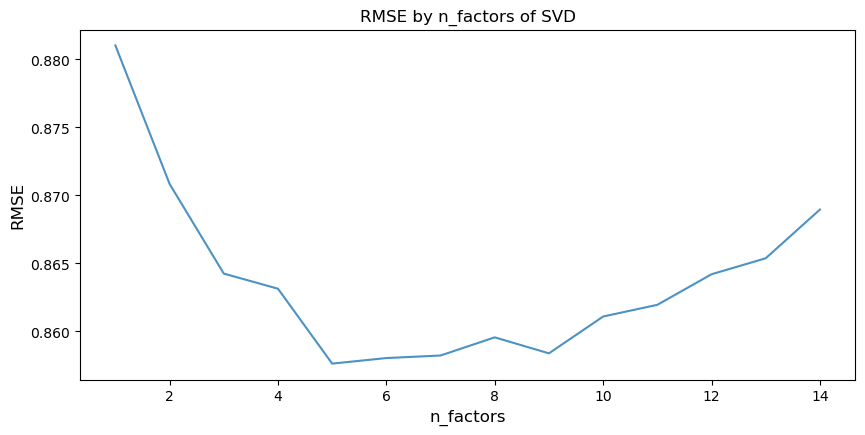

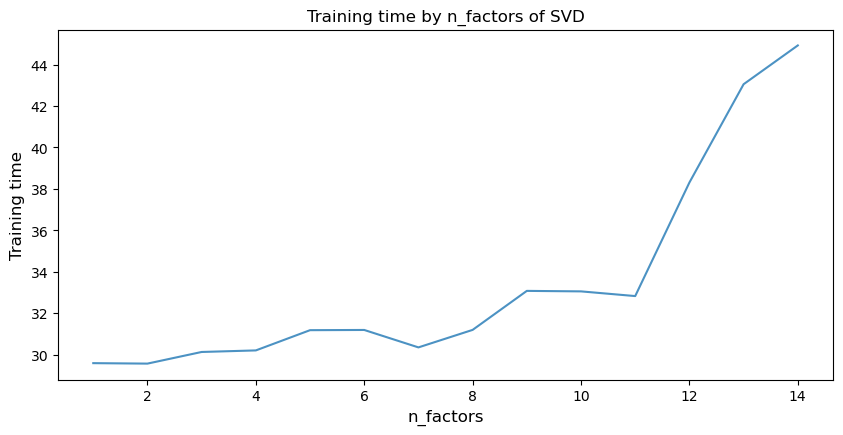

In [76]:
# 하이퍼파라미터에 따른 RMSE 시각화 : 작을수록 좋음
plt.subplot(2, 1, 1)
plt.plot(range(1, 15), rmse_list_by_factors, alpha=0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()  # n_factors = 5 가장 최적

# 하이퍼파라미터에 따른 시간 시각화
plt.subplot(2, 1, 2)
plt.plot(range(1, 15), ttime_list_by_factors, alpha=0.8)
plt.title('Training time by n_factors of SVD')
plt.ylabel('Training time', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()  # n_factors = 11 넘어가면 비효율적

In [83]:
# target_user_movie_predict_dict가 target_user_top10_predicted화 되어 버림
target_user_movie_predict_dict

[(106, 5),
 (116, 5),
 (175, 5),
 (326, 5),
 (527, 5),
 (593, 5),
 (602, 5),
 (608, 5),
 (669, 5),
 (858, 5)]

In [103]:
# model test
test_data = []

# 타깃 유저 정보를 테스트 데이터로 생성
for idx, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

target_user_predictions = model.test(test_data)

# 타깃 유저가 본 영화 예상 평점 기록하는 함수
def get_user_predicted_ratings(predictions, target, history):
    target_user_movie_predict_dict = {}
    for uid, mid, r_ui, est, _ in predictions:
            if target == uid:
                if mid in history:
                    target_user_movie_predict_dict[mid] = est
    return target_user_movie_predict_dict

# 타깃 유저가 본 영화 예상 평점
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                            target = test_data[0][0],
                                                            history = target_user_movie_rating_dict)

target_user_movie_predict_dict # = dict(sorted(target_user_movie_predict_dict.items(), reverse = True)[:10])

{260: 4.054457026567288,
 480: 3.1673031598548738,
 1036: 3.624013831188125,
 1097: 4.169846095579795,
 1196: 3.5887288312511947,
 1198: 4.287372203944555,
 1201: 4.483705373384439,
 1210: 3.3058198332995383,
 1214: 3.87427620429979,
 1240: 3.6798323848374483,
 1387: 4.470623732384524,
 1954: 4.5621887878627785,
 2028: 4.743575170877627,
 2366: 3.866896099476611,
 2692: 3.8233129950368054,
 2947: 4.100394015879607,
 2951: 4.257355212327968,
 3418: 3.773081222703994,
 3468: 4.965426911595795,
 3527: 2.883192214884721,
 3702: 3.524521798166391}

In [109]:
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0
for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    
    origin_rating = target_user_movie_rating_dict[movie_id]
    predicted_rating = round(predicted_rating, 2)  # 소숫점 둘째자리까지 반올림
    movie_title = movie_dict[movie_id]
    
    # 4번 유저가 실제 관람한 영화의 평점 넣기
    origin_rating_list.append(origin_rating)
    # 4번 유저가 관람한 영화의 예상 평점 넣기
    predicted_rating_list.append(predicted_rating)
    # 해당 영화의 제목
    movie_title_list.append(movie_title)           
    
    print('movie number of ', str(idx), ":", movie_title, "-", origin_rating, "/", predicted_rating )

movie number of  1 : Star Wars: Episode IV - A New Hope (1977) - 5 / 4.05
movie number of  2 : Jurassic Park (1993) - 4 / 3.17
movie number of  3 : Die Hard (1988) - 4 / 3.62
movie number of  4 : E.T. the Extra-Terrestrial (1982) - 4 / 4.17
movie number of  5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / 3.59
movie number of  6 : Raiders of the Lost Ark (1981) - 5 / 4.29
movie number of  7 : Good, The Bad and The Ugly, The (1966) - 5 / 4.48
movie number of  8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / 3.31
movie number of  9 : Alien (1979) - 4 / 3.87
movie number of  10 : Terminator, The (1984) - 5 / 3.68
movie number of  11 : Jaws (1975) - 5 / 4.47
movie number of  12 : Rocky (1976) - 5 / 4.56
movie number of  13 : Saving Private Ryan (1998) - 5 / 4.74
movie number of  14 : King Kong (1933) - 4 / 3.87
movie number of  15 : Run Lola Run (Lola rennt) (1998) - 5 / 3.82
movie number of  16 : Goldfinger (1964) - 5 / 4.1
movie number of  17 : Fistful of Dollar

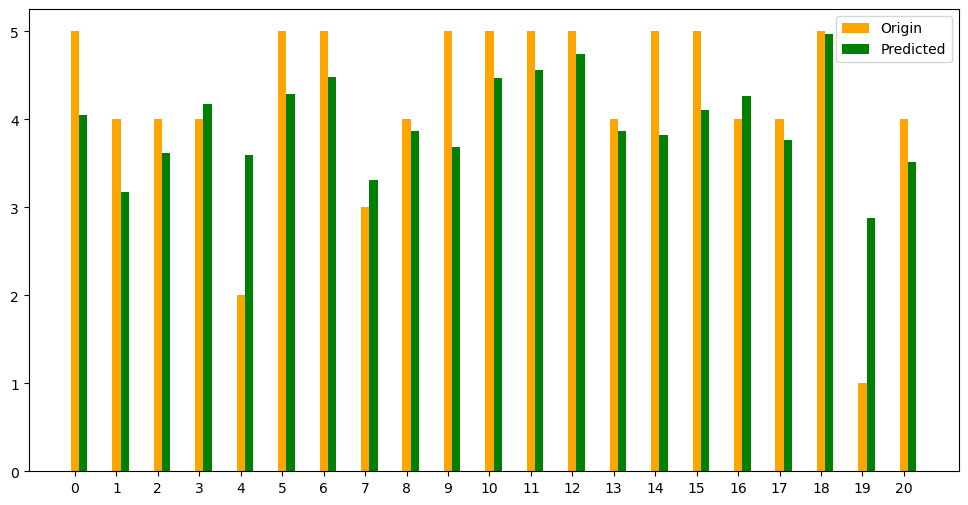

In [116]:
origin = origin_rating_list
predicted = predicted_rating_list

plt.rcParams['figure.figsize'] = [12, 6]
index = np.arange(len(movie_title_list))
bar_width = 0.2

rects1 = plt.bar(index, origin, bar_width,
                 color = 'orange', label = 'Origin')
rects2 = plt.bar(index+bar_width, predicted, bar_width,
                 color = 'green', label = 'Predicted')

plt.xticks(index)
plt.legend()
plt.show()